### QED-C Prototype Benchmarks - Qiskit Version
The notebook contains a suite of prototype application benchmarks for the IBM Qiskit API.
Configure and run the cell below with the desired execution settings.
Then execute the remaining cells, each containing one prototype benchmark program.

In [1]:
min_qubits=2
max_qubits=8
max_circuits=3
num_shots=1000

backend_id="qasm_simulator"
hub="ibm-q"; group="open"; project="main"
provider_backend = None
exec_options = None

# # *** If using IBMQ hardware, run this once to authenticate
# from qiskit import IBMQ
# IBMQ.save_account('YOUR_API_TOKEN_HERE')

# # *** If you are part of an IBMQ group, set hub, group, and project name here
# hub="YOUR_HUB_NAME"
# group="YOUR_GROUP_NAME"
# project="YOUR_PROJECT_NAME"

# # *** This example shows how to specify the backend using a known "backend_id"
# # Use 'sabre' layout for IBM backends
# exec_options = { "optimization_level":3, "layout_method":'sabre', "routing_method":'sabre' }
# backend_id="ibmq_belem"

# # *** Here's an example of using a typical custom provider backend (e.g. AQT simulator)
# import os
# from qiskit_aqt_provider import AQTProvider
# provider = AQTProvider(os.environ.get('AQT_ACCESS_KEY'))    # get your key from environment
# provider_backend = provider.backends.aqt_qasm_simulator_noise_1
# backend_id="aqt_qasm_simulator_noise_1"

# # An example using IonQ provider
# from qiskit_ionq import IonQProvider
# provider = IonQProvider()   # Be sure to set the QISKIT_IONQ_API_TOKEN environment variable
# provider_backend = provider.get_backend("ionq_qpu")
# backend_id="ionq_qpu"

# # *** Use these lines when running on hardware backend, to limit use of resources
min_qubits=4
max_qubits=10
max_circuits=3
num_shots=1000

MaxCut Benchmark Program - Qiskit
... execution starting at 2022-01-06 20:05:45
************
Executing [3] circuits with num_qubits = 4
************
Average Depth, ξ (xi) for the 4 qubit group = 21, 0.462
Average Transpiled Depth, ξ (xi) for the 4 qubit group = 22, 0.4
Average Creation Time for the 4 qubit group = 0.775 secs
Average Elapsed Time for the 4 qubit group = 0.044 secs
Average Execution Time for the 4 qubit group = 0.005 secs
Average Fidelity for the 4 qubit group = 0.812

************
Executing [3] circuits with num_qubits = 6
************
Executing [3] circuits with num_qubits = 8
************
Executing [3] circuits with num_qubits = 10
************
Average Depth, ξ (xi) for the 6 qubit group = 30, 0.496
Average Transpiled Depth, ξ (xi) for the 6 qubit group = 31, 0.44
Average Creation Time for the 6 qubit group = 0.005 secs
Average Elapsed Time for the 6 qubit group = 0.507 secs
Average Execution Time for the 6 qubit group = 0.006 secs
Average Fidelity for the 6 qubit gro

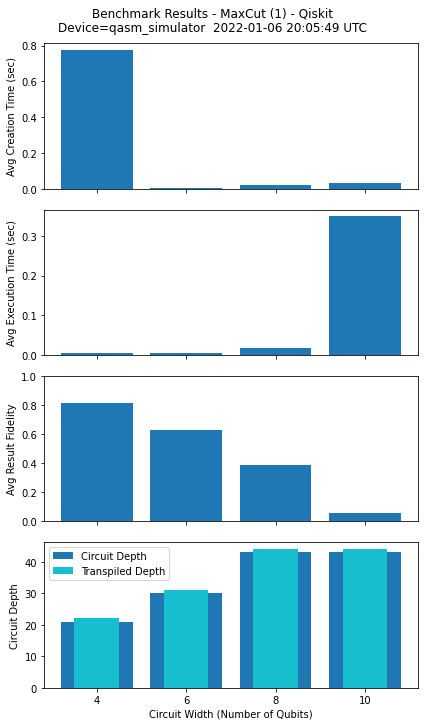

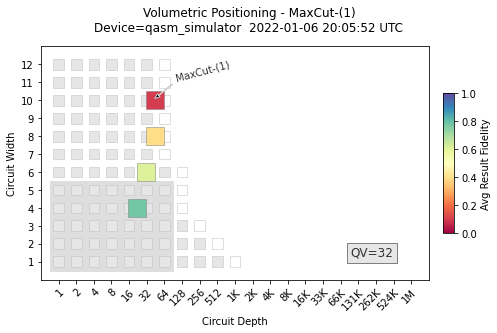

In [2]:
#%run bernstein-vazirani/qiskit/maxcut_benchmark.py
import sys
sys.path.insert(1, "maxcut/qiskit")
import maxcut_benchmark

# set noise to None for testing
import execute
#execute.set_noise_model(None)

maxcut_benchmark.verbose=False

maxcut_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, max_circuits=max_circuits, num_shots=num_shots,
                method=1, rounds=1,
                backend_id=backend_id, provider_backend=provider_backend,
                hub=hub, group=group, project=project, exec_options=exec_options)

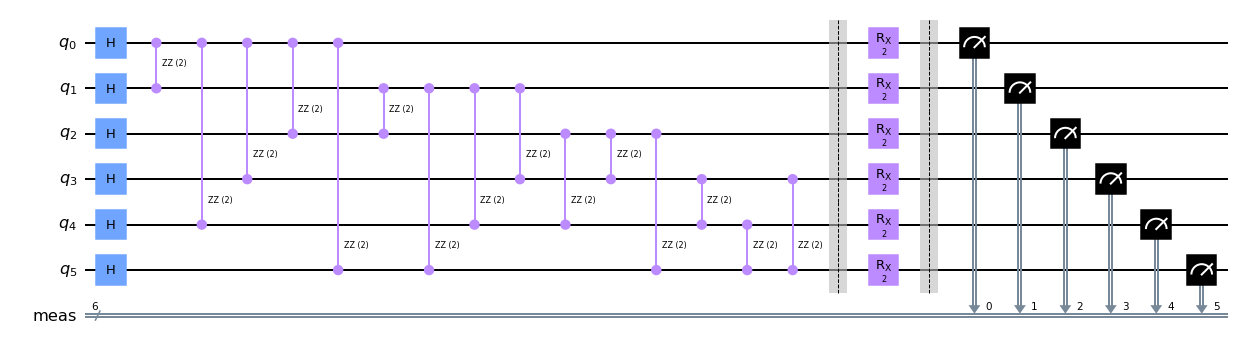

In [7]:
maxcut_benchmark.QC_.draw('mpl',scale=1)
#print(circuit)